In [90]:
# Scientific computing
import numpy as np
np.random.seed(2020)
import scipy.stats as ss

# Plotting functionality
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm

# Make display wider
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [150]:
def himmelblau_loss(x,y):
    """
    Himmelblau loss function: f(x,y) = (x^2+y-11)^2 + (x+y^2-7)^2
    """
    return (x**2+y-11)**2 + (x+y**2-7)**2

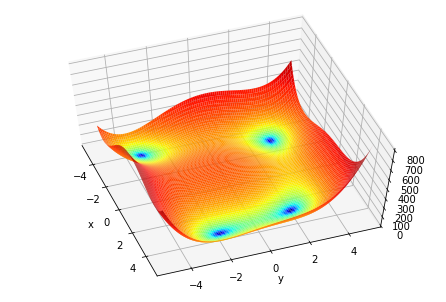

In [176]:
# Surface plot 
fig = plt.figure()
ax = Axes3D(fig, azim = -29, elev = 49)
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = himmelblau_loss(X,Y)
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet)
ax.view_init(60, -20)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [393]:
def contour_plot_trajectory(X, Y, Z, path):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.contour(X, Y, Z,levels=np.logspace(0, 3.4, 35), norm = LogNorm(), cmap = cm.jet)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title('Himmelblau loss function trajectory')
    
    # Plot trajectory
    color = 'black'
    ax.quiver(path[:-1,0], path[:-1,1], path[1:,0]-path[:-1,0], path[1:,1]-path[:-1,1],
              scale_units='xy', angles='xy', scale=1,color=color)
    ax.scatter(path[:,0],path[:,1], color=color, marker='o', s=35)
    
def contour_plot_iteration(X, Y, Z, population, iteration, reward, ax = None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8,6))
    ax.contour(X, Y, Z,levels=np.logspace(0, 3.4, 35), norm = LogNorm(), cmap = cm.jet)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f'Iteration {iteration}. Reward: {round(reward,2)}')
    
    # Plot trajectory
    ax.scatter(population[:,0], population[:,1], color='black', marker='o', s=20)

/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Log scale: values of z <= 0 have been masked
  This is separate from the ipykernel package so we can avoid doing imports until


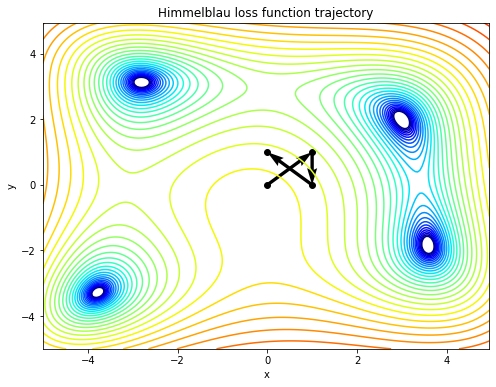

/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Log scale: values of z <= 0 have been masked


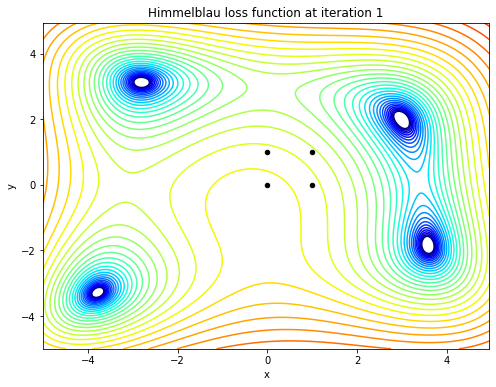

In [233]:
# Plot trajectory
test_path = np.array([[0,0],[1,1],[1,0], [0,1]])
contour_plot_trajectory(X, Y, Z, test_path)
plt.show()

# Plot iteration
contour_plot_iteration(X, Y, Z, test_path, 1)
plt.show()

In [425]:
def gaussian_ES(n_iter, Λ, λ, μ_0, Σ_0, loss_func):
    """
    Gaussian Evolution Strategy algorithm (without covariances)
    
    :param n_iter    (int) number of iterations
    :param Λ         (float) population size
    :param λ         (float) elite group size
    :param μ_0       (array) initial mean vector
    :param Σ_0       (array) initial covariance matrix
    :param loss_func (function) loss function to be optimized 
    
    :return θ        (matrix) parameter values for each iteration, 
    :return fitness  (matrix) fitness score for each member for each iteration
    """
    μ, Σ = np.zeros((n_iter, Σ_0.shape[0])), np.zeros((n_iter, Σ_0.shape[0], Σ_0.shape[0]))
    loss = np.zeros((n_iter, λ))
    μ[0], Σ[0] = μ_0, Σ_0
    fig, ax = plt.subplots(3, 4, figsize=(18,12))
    ax = ax.ravel()

    for i in range(n_iter):
        if i==0:
            continue
            
        # Generate λ population members
        population = np.random.multivariate_normal(mean=μ[i-1], cov=np.diag(Σ[i-1])*np.eye(2), size=Λ)
        fitness    = loss_func(population[:,0], population[:,1])
        reward     = loss_func(μ[i-1,0], μ[i-1,1])
        elite_idx  = np.argsort(fitness)[:λ]
        elite      = population[elite_idx]
   
        # Update μ and Σ
        μ[i] = np.mean(elite, axis=0)
        Σ[i] = np.std(elite)
    
        if i%1==0:
            contour_plot_iteration(X, Y, Z, population, i, reward, ax=ax[i-1])
            
    fig.tight_layout()
    return μ, Σ, loss

/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Log scale: values of z <= 0 have been masked


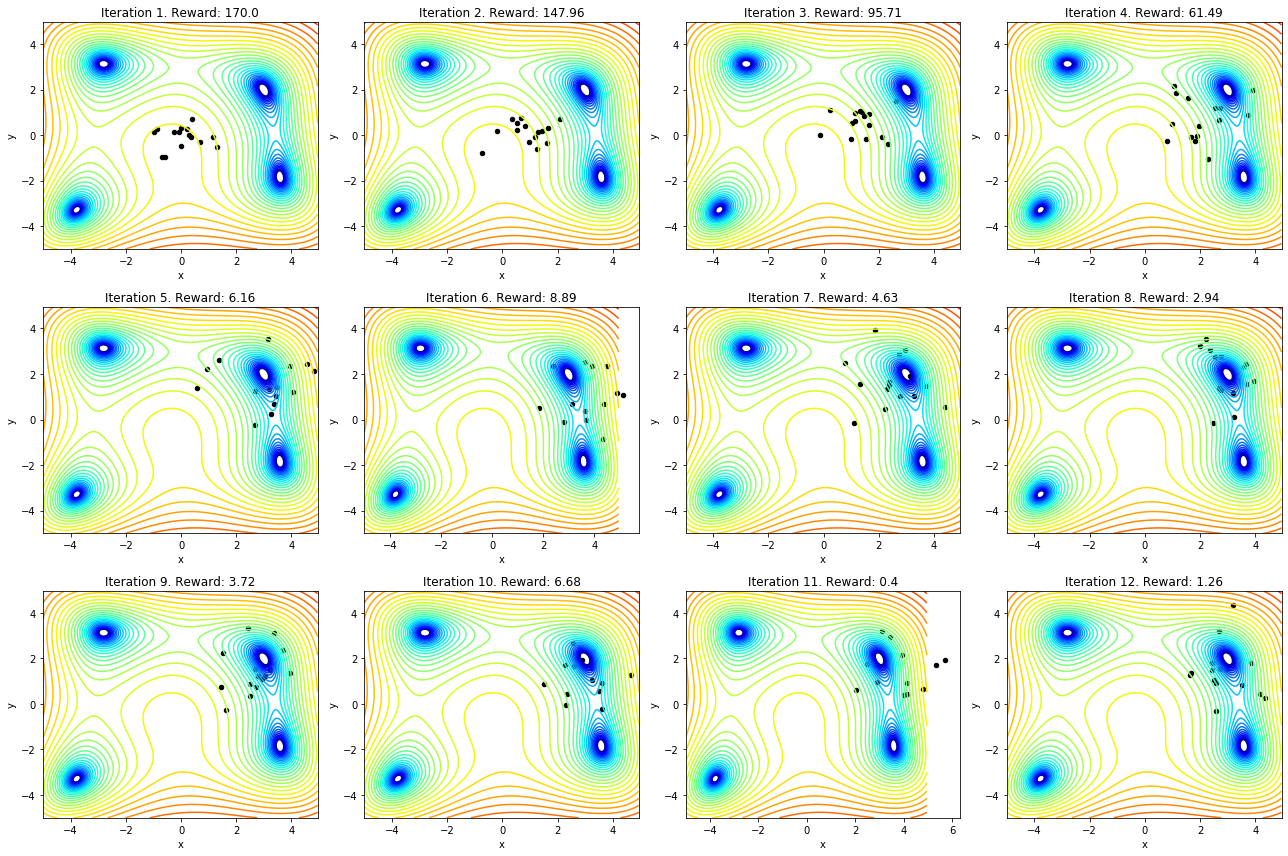

In [426]:
μ_0, Σ_0  = np.array([0.,0.]), np.array([[.6,.1],[.1,.4]])
n_iter    = 12
Λ, λ      = 15, 5

μ, Σ, loss = gaussian_ES(n_iter+1, Λ, λ, μ_0, Σ_0, himmelblau_loss)
#contour_plot_trajectory()
#plt.show()